# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

#Import data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# since the data are merged into one collumn and seperated by space, we will use delim_whitespace
# and we wll also give name to each collumn

df = pd.read_csv('/content/drive/MyDrive/Machine Learning Datasets/housing.csv', delim_whitespace = r"\s+", names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B-1000', 'LSTAT', 'MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B-1000,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#Data Analysis

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B-1000,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# melihat informasi tipe data dan jumlah nilai yang terisi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B-1000   506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
# mencari variabel dengan korelasi tertinggi

import seaborn as sns

df.corr().style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B-1000,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# variabel yang ada dipisahkan menjadi X yaitu independent variable dan y yaitu dependent variable
# kita akan menggunakan variabel dengan nilai >= 0.5
# variabel lain akan di 'drop'

X = df.iloc[:, :-1]    # independent varible
y = df.iloc[:, -1]     # dependent variable

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B-1000,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [ ]:
X = X.drop(['INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN', 'B-1000', 'DIS', 'CHAS'], axis=1)
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


# Data Standardization



In [ ]:
# standarisasi data dilakukan agar data lebih mudah diolah
sc = StandardScaler()
X = sc.fit_transform(X)
print (X[:10])

[[ 0.41367189 -1.45900038 -1.0755623 ]
 [ 0.19427445 -0.30309415 -0.49243937]
 [ 1.28271368 -0.30309415 -1.2087274 ]
 [ 1.01630251  0.1130321  -1.36151682]
 [ 1.22857665  0.1130321  -1.02650148]
 [ 0.20709638  0.1130321  -1.04332233]
 [-0.38841095 -1.50523663 -0.03126762]
 [-0.16046556 -1.50523663  0.91070021]
 [-0.9312059  -1.50523663  2.42177359]
 [-0.39980821 -1.50523663  0.62334395]]


#Splitting Dataset

In [ ]:
# data yang digunakan untuk test sebesar 20% dan training sebesar 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# dibuat menjadi array 2D
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]                        
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

# Gradient Descent

In [ ]:
# rumus cost function untuk MLR

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y)**2)/(2 * m)
    return J

def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
     # Hypothesis Values
         h = X.dot(B)
     # Difference b/w Hypothesis and Actual Y
         loss = h - Y
     # Gradient Calculation
         gradient = X.T.dot(loss) / m
     # Changing Values of B using Gradient
         B = B - alpha * gradient
     # New Cost Value
         cost = cost_function(X, Y, B)
         cost_history[iteration] = cost
    return B, cost_history

#Calculate Prediction

In [ ]:
# epoch = 300 dan learning rate = 0.05
b = np.zeros(X_train.shape[1])
alpha = 0.01
iter_ = 10000
newb, cost_history = batch_gradient_descent(X_train, y_train, b, alpha, iter_)

Text(0.5, 1.0, 'Error vs. Training Epoch')

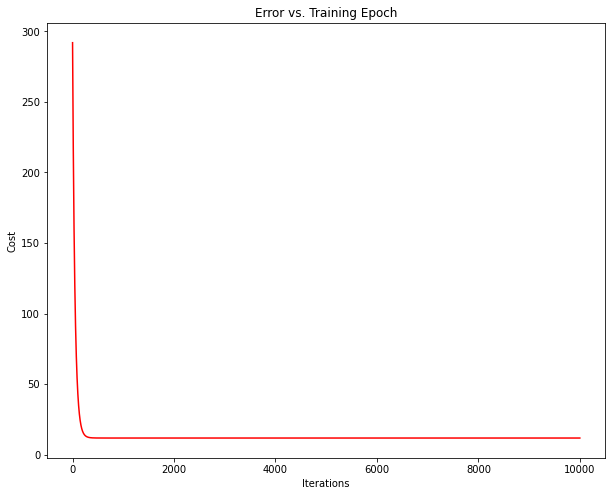

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(iter_), cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# Data Validation

In [ ]:
# perbandingan hasil prediksi dengan asli
y_pred = X_test.dot(newb)
print(y_pred)
print(y_test)

[27.60903054 22.09903399 26.52925454 12.50798575 22.25487898 20.17063891
 19.66763431 21.17945215 17.05361787 21.47645249 14.61188065 17.25203106
 17.87834594  4.63763054 39.49396811 34.51171811 21.51354177 38.44114322
 30.01522647 22.1120067  25.01756609 25.47821806 18.29949317 27.53525285
 22.04425617  9.8766314  17.64455251 22.58495171 35.56415926 19.94695236
 17.07488901 18.54782062 23.03506219 24.0227991  27.32559903 17.39669651
 11.20037267 21.01877579 17.99452878 13.48338053 27.03969738 20.22025653
 25.79579308 13.77875148 28.87448892 25.92551494 21.42412497 24.76182896
 11.37786561 23.54614643 24.91747489 16.26246249 23.05899832 35.50989662
 14.52731963 22.83041034 22.00550472 20.52680975 19.80762071 18.37114766
 23.84391837 21.86386107 32.71351223 30.0351469  16.94378867 32.09219353
 19.25207073 22.18373343 18.91244658 21.76020302 22.66827441 24.44195878
 29.87151764 30.69195738 25.40669919  3.98664799 37.15488381 23.55790303
 26.0983772  18.80564076 29.09705973 19.06540614 18

In [ ]:
total_data = len(df)

MSE = mean_squared_error(y_test, y_pred)
print ("MSE :", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print ("RMSE :", RMSE)

score = r2_score(y_test, y_pred)
print ("R2 :", score)

r2adj = 1 - (1 - score) * ((total_data - 1) / (total_data - 4 - 1))
print ("Adjusted R-Squared :", r2adj)

MSE : 41.67799012221658
RMSE : 6.4558492951908795
R2 : 0.48816420156925366
Adjusted R-Squared : 0.48407768820852914


Berdasarkan model di atas, didapatkan hasil akurasi sebesar 48.8 persen. Hal ini menurut saya cukup baik namun dapat diperbaiki kembali. Akurasi ini dapat terjadi karena kemungkinan ada beberapa outlier yang belum dibersihkan.